# **🛒📊💻📈💵 Big Mart Sales Prediction Datasets By Rohit Raut**

1.Introduction


In this notebook, we aim to predict the sales of products across different BigMart outlets. Using historical sales data and various product and outlet attributes, we will build a regression model to make predictions. The model's performance will be evaluated using Root Mean Squared Error (RMSE)..

# Importing Libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [143]:
warnings.filterwarnings('ignore')

## Loading Data

In [144]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [145]:
train_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
424,NCU41,18.85,Low Fat,0.052136,Health and Hygiene,190.1846,OUT049,1999,Medium,Tier 1,Supermarket Type1,6687.9610
7825,FDT25,7.50,Low Fat,0.050958,Canned,122.4072,OUT018,2009,Medium,Tier 3,Supermarket Type2,2572.6512
5586,NCA17,20.60,Low Fat,0.045510,Health and Hygiene,149.6392,OUT045,2002,NaN,Tier 2,Supermarket Type1,894.8352
5488,FDX11,16.00,Regular,0.106752,Baking Goods,181.4634,OUT046,1997,Small,Tier 1,Supermarket Type1,1090.5804
7068,NCZ30,6.59,Low Fat,0.026238,Household,121.6098,OUT045,2002,NaN,Tier 2,Supermarket Type1,2410.1960


In [146]:
test_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
329,FDD51,11.150,Low Fat,0.120441,Dairy,43.7744,OUT018,2009,Medium,Tier 3,Supermarket Type2
3528,FDY60,10.500,Regular,0.000000,Baking Goods,143.5128,OUT049,1999,Medium,Tier 1,Supermarket Type1
924,FDI27,8.710,Regular,0.045986,Dairy,45.5744,OUT046,1997,Small,Tier 1,Supermarket Type1
705,FDB28,6.615,Low Fat,0.093385,Dairy,197.8426,OUT046,1997,Small,Tier 1,Supermarket Type1
3597,FDN03,9.800,Regular,0.015113,Meat,248.7408,OUT049,1999,Medium,Tier 1,Supermarket Type1


Find the Shape of our Dataset

In [147]:
train_data.shape

(8523, 12)

In [148]:
test_data.shape

(5681, 11)

Getting more Information about the dataset

In [149]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [150]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


#Data Cleaning


## Checking null values in dataset

In [290]:
train_data.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0
Item_Outlet_Sales,0
Item_Weight_interp,0


In [291]:
test_data.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0
Item_Weight_interp,0
Item_Visibility_interpolate,0


In [292]:
per_null_train = train_data.isnull().sum()/train_data.shape[0]*100
per_null_train

,0
Item_Identifier,0.0
Item_Fat_Content,0.0
Item_Type,0.0
Item_MRP,0.0
Outlet_Identifier,0.0
Outlet_Size,0.0
Outlet_Location_Type,0.0
Outlet_Type,0.0
Item_Outlet_Sales,0.0
Item_Weight_interp,0.0


In [293]:
per_null_test = test_data.isnull().sum()/test_data.shape[0]*100
per_null_test

,0
Item_Identifier,0.0
Item_Fat_Content,0.0
Item_Type,0.0
Item_MRP,0.0
Outlet_Identifier,0.0
Outlet_Size,0.0
Outlet_Location_Type,0.0
Outlet_Type,0.0
Item_Weight_interp,0.0
Item_Visibility_interpolate,0.0


As missing value percentage of both the datasets exceeding 5% threshold. We can't drop null value

## Checking Duplicate values

In [155]:
train_data.duplicated().sum()

0

In [156]:
test_data.duplicated().sum()

0

## Handling Missing Values

In [157]:
test_data['Item_Weight'].dtype

dtype('float64')

In [158]:
test_data['Outlet_Size'].dtype

dtype('O')

different approaches need to handle numerical data and catagorical data **bold text**

### Univariate Imputation

In [159]:
mean_weight_train = train_data['Item_Weight'].mean()
median_weight_train = train_data['Item_Weight'].median()
print(mean_weight_train)
print(median_weight_train)

12.857645184135976
12.6


In [160]:
mean_weight_test = test_data['Item_Weight'].mean()
median_weight_test = test_data['Item_Weight'].median()
print(mean_weight_test)
print(median_weight_test)

12.695633368756642
12.5


In [161]:
test_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5615,FDF04,NaN,Low Fat,0.013571,Frozen Foods,258.5304,OUT027,1985,Medium,Tier 3,Supermarket Type3
1434,FDU56,16.85,Low Fat,0.000000,Fruits and Vegetables,185.3266,OUT035,2004,Small,Tier 2,Supermarket Type1
3242,DRE27,11.85,low fat,0.133211,Dairy,95.8726,OUT018,2009,Medium,Tier 3,Supermarket Type2
4723,FDL13,13.85,Regular,0.056319,Breakfast,234.0300,OUT046,1997,Small,Tier 1,Supermarket Type1
1420,FDX51,9.50,Regular,0.022040,Meat,194.1452,OUT013,1987,High,Tier 3,Supermarket Type1


In [162]:
train_data['Item_Weight_mean'] = train_data['Item_Weight'].fillna(mean_weight_train)
train_data['Item_Weight_median'] = train_data['Item_Weight'].fillna(median_weight_train)
test_data['Item_Weight_mean'] = test_data['Item_Weight'].fillna(mean_weight_test)
test_data['Item_Weight_median'] = test_data['Item_Weight'].fillna(median_weight_test)

In [163]:
train_data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50


In [164]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_mean,Item_Weight_median
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.750000,20.750
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,8.300000,8.300
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,14.600000,14.600
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,7.315000,7.315
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,12.695633,12.500


Checking Variance

In [165]:
print("train:Orignal Item weight variable variance", train_data['Item_Weight'].var())
print("train:Item weight variable variance after mean imputation",train_data['Item_Weight_mean'].var())
print("train:Item weight variable variance after mean imputation",train_data['Item_Weight_median'].var())

train:Orignal Item weight variable variance 21.56168825983637
train:Item weight variable variance after mean imputation 17.860121735060453
train:Item weight variable variance after mean imputation 17.869561454073366


In [166]:
print("Test:Orignal Item weight variable variance",test_data['Item_Weight'].var())
print("Test:Item weight variable variance after mean imputation",test_data['Item_Weight_mean'].var())
print("Test:Item weight variable variance after mean imputation",test_data['Item_Weight_median'].var())

Test:Orignal Item weight variable variance 21.760812343231475
Test:Item weight variable variance after mean imputation 18.021630503971995
Test:Item weight variable variance after mean imputation 18.027077062656364


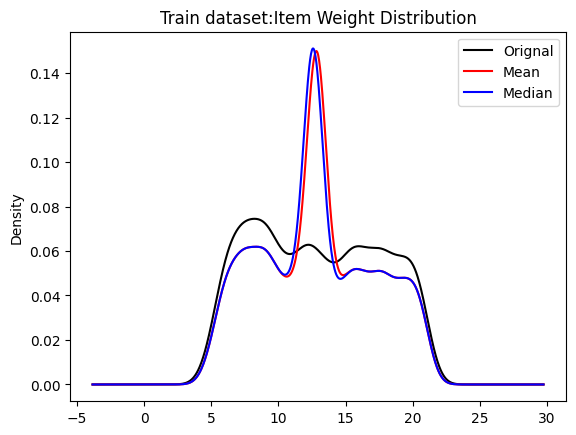

In [167]:
train_data['Item_Weight'].plot(kind='kde', color='black',label='Orignal')
train_data['Item_Weight_mean'].plot(kind='kde', color='red',label='Mean')
train_data['Item_Weight_median'].plot(kind='kde', color='blue',label='Median')
plt.title('Train dataset:Item Weight Distribution')
plt.legend()
plt.show()

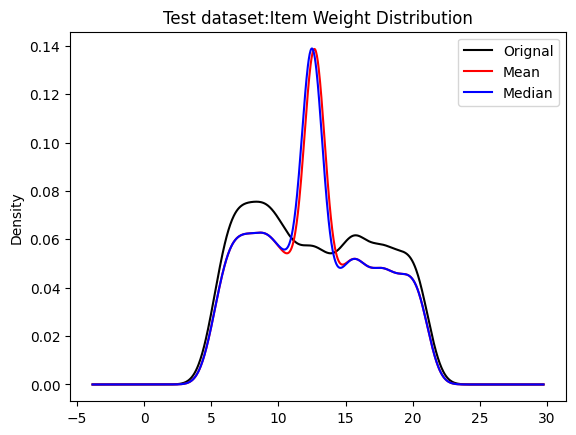

In [168]:
test_data['Item_Weight'].plot(kind='kde', color='black',label='Orignal')
test_data['Item_Weight_mean'].plot(kind='kde', color='red',label='Mean')
test_data['Item_Weight_median'].plot(kind='kde', color='blue',label='Median')
plt.title('Test dataset:Item Weight Distribution')
plt.legend()
plt.show()

The data distribution has been alter after mean and median imputation

<Axes: >

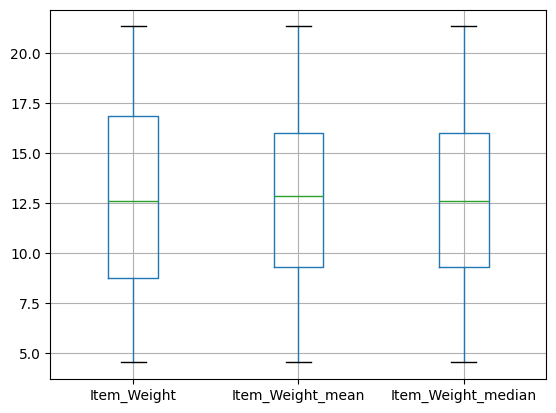

In [169]:
train_data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

<Axes: >

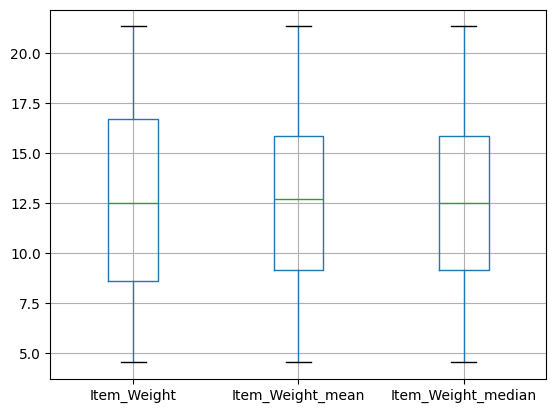

In [170]:
test_data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

After imputation :  Reduction of spread of data is obseerved(Not Desirable)

In [171]:
train_data["Item_Weight_interp"] = train_data["Item_Weight"].interpolate(method='linear')

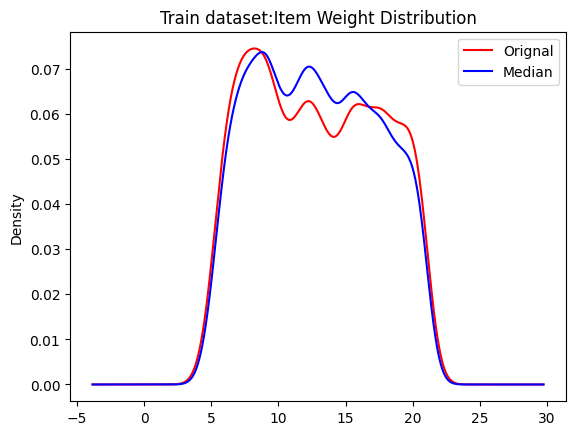

In [172]:
train_data['Item_Weight'].plot(kind='kde', color='red',label='Orignal')
train_data['Item_Weight_interp'].plot(kind='kde', color='blue',label='Median')
plt.title('Train dataset:Item Weight Distribution')
plt.legend()
plt.show()

In [173]:
test_data["Item_Weight_interp"] = test_data["Item_Weight"].interpolate(method='linear')

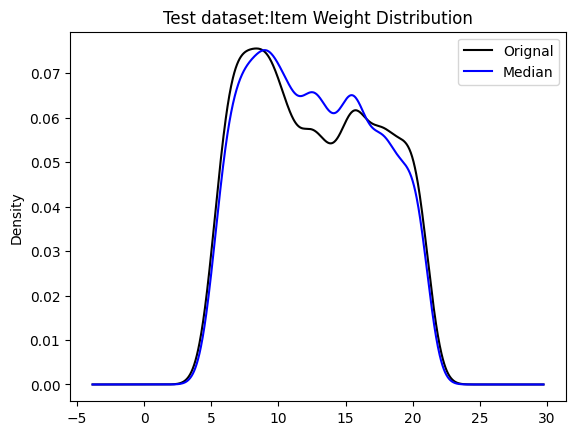

In [174]:
test_data['Item_Weight'].plot(kind='kde', color='black',label='Orignal')
test_data['Item_Weight_interp'].plot(kind='kde', color='blue',label='Median')
plt.title('Test dataset:Item Weight Distribution')
plt.legend()
plt.show()

Interpolation is better than mean and median

### Multivariate Imputation

In [175]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator

In [176]:
knn = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
si = SimpleImputer(missing_values=np.nan, strategy='mean')

In [177]:
train_data['Item_Weight_knn_imp'] = knn.fit_transform(train_data[['Item_Weight']])

In [178]:
train_data['Item_Weight_si_imp'] = si.fit_transform(train_data[['Item_Weight']])

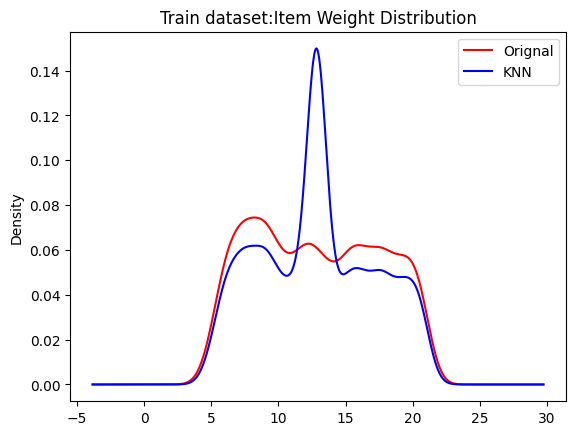

In [179]:
train_data['Item_Weight'].plot(kind='kde', color='red',label='Orignal')
train_data['Item_Weight_knn_imp'].plot(kind='kde', color='blue',label='KNN')
plt.title('Train dataset:Item Weight Distribution')
plt.legend()
plt.show()

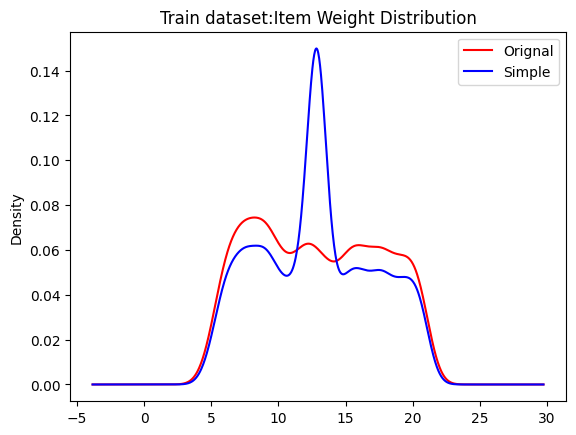

In [180]:
train_data['Item_Weight'].plot(kind='kde', color='red',label='Orignal')
train_data['Item_Weight_si_imp'].plot(kind='kde', color='blue',label='Simple')
plt.title('Train dataset:Item Weight Distribution')
plt.legend()
plt.show()

noe lets drop non valid imputed columns

In [181]:
train_data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median,Item_Weight_interp,Item_Weight_knn_imp,Item_Weight_si_imp
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3,9.3,9.3,9.3


In [182]:
train_data = train_data.drop(columns=['Item_Weight','Item_Weight_si_imp','Item_Weight_knn_imp','Item_Weight_mean','Item_Weight_median'],axis=1)

In [183]:
train_data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interp
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [184]:
train_data.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


Deleting non rational imputational columns

In [185]:
test_data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_mean,Item_Weight_median,Item_Weight_interp
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.75,20.75,20.75


In [186]:
test_data = test_data.drop(columns=['Item_Weight','Item_Weight_mean','Item_Weight_median'],axis=1)

In [187]:
#hndling Missing data in Outlet_size

## Handling Missing data in Outlet_size

In [188]:
a = train_data['Outlet_Size'].value_counts()
b = train_data['Outlet_Type'].value_counts()
print(a)
print(b)

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64


In [189]:
train_outlet_mode = train_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc= (lambda x: x.mode()[0]))

In [190]:
train_outlet_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [191]:
missing_value = train_data['Outlet_Size'].isnull()

In [192]:
missing_value

,Outlet_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


In [193]:
train_data.loc[missing_value,'Outlet_Size'] = train_data.loc[missing_value,'Outlet_Type'].apply(lambda x: train_outlet_mode[x])

In [194]:
train_data.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [195]:
c = test_data['Outlet_Size'].value_counts()
d = test_data['Outlet_Type'].value_counts()
print(c)
print(d)

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64
Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64


In [196]:
test_outlet_mode = test_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc= (lambda x: x.mode()[0]))

In [197]:
test_outlet_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [198]:
missing_value = test_data['Outlet_Size'].isnull()

In [199]:
test_data.loc[missing_value,'Outlet_Size'] = test_data.loc[missing_value,'Outlet_Type'].apply(lambda x: train_outlet_mode[x])

In [200]:
test_data.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


Item Fat Content

In [201]:
train_data.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interp
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92


In [202]:
train_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [203]:
train_data = train_data.replace({'Item_Fat_Content': {'Low Fat':'LF','low fat' :'LF', 'Regular' : 'reg'}})

In [204]:
train_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
LF,5517
reg,3006


In [205]:
test_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [206]:
test_data = test_data.replace({'Item_Fat_Content': {'Low Fat':'LF','low fat' :'LF', 'Regular' : 'reg'}})

In [207]:
test_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
LF,3668
reg,2013


## Item Visibility

In [208]:
train_data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interp
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [209]:
train_data['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,526
0.076975,3
0.162462,2
0.076841,2
0.073562,2
...,...
0.013957,1
0.110460,1
0.124646,1


In [210]:
train_data['Item_Visibility_interpolate'] = train_data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [211]:
train_data['Item_Visibility_interpolate'].value_counts()

,count
Item_Visibility_interpolate,
0.076975,3
0.044024,2
0.040912,2
0.076856,2
0.078759,2
...,...
0.021011,1
0.099189,1
0.076866,1


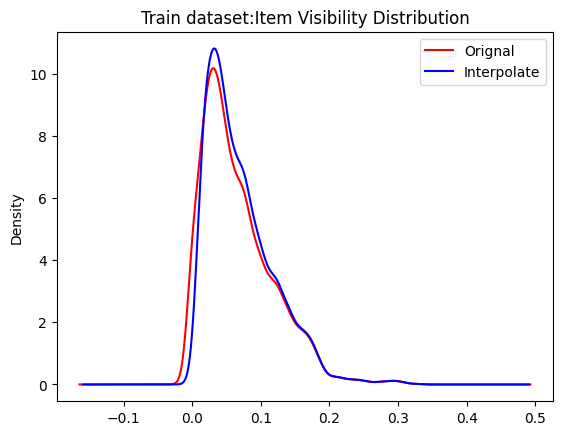

In [212]:
train_data['Item_Visibility'].plot(kind='kde', color='red',label='Orignal')
train_data['Item_Visibility_interpolate'].plot(kind='kde', color='blue',label='Interpolate')
plt.title('Train dataset:Item Visibility Distribution')
plt.legend()
plt.show()

In [213]:
train_data.drop(columns=['Item_Visibility'],axis=1,inplace=True)

In [214]:
train_data.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interp,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,reg,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278


In [215]:
# Same for Test dataset
test_data['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,353
0.060879,2
0.097213,2
0.058461,2
0.058132,2
...,...
0.082382,1
0.026175,1
0.155144,1


In [216]:
test_data['Item_Visibility_interpolate'] = test_data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

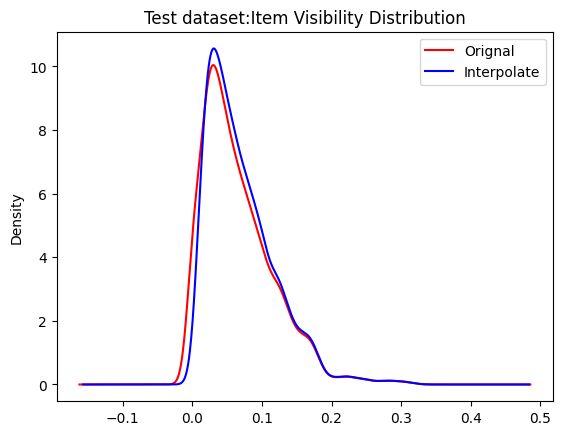

In [217]:
test_data['Item_Visibility'].plot(kind='kde', color='red',label='Orignal')
test_data['Item_Visibility_interpolate'].plot(kind='kde', color='blue',label='Interpolate')
plt.title('Test dataset:Item Visibility Distribution')
plt.legend()
plt.show()

In [218]:
test_data.drop(columns=['Item_Visibility'],axis=1,inplace=True)

In [219]:
test_data.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interp,Item_Visibility_interpolate
0,FDW58,LF,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.75,0.007565
1,FDW14,reg,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,8.30,0.038428


## Item_Type

In [220]:
train_data['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


## Item_Identifier

In [221]:
train_data['Item_Identifier'].value_counts().sample(7)

,count
Item_Identifier,
NCX06,5
NCJ29,6
FDK25,6
NCV29,5
FDN25,5
FDK04,5
FDZ47,5


FD = Food & Drinks
NC = Non-Consumables

In [222]:
train_data['Item_Identifier'] = train_data['Item_Identifier'].apply(lambda x: x[0:2])

In [223]:
train_data['Item_Identifier'].value_counts()

,count
Item_Identifier,
FD,6125
NC,1599
DR,799


for testing dataset

In [224]:
test_data['Item_Identifier'].value_counts().sample(7)

,count
Item_Identifier,
FDO27,5
FDS52,2
FDT59,4
FDR55,1
FDA49,4
NCP14,6
FDS10,5


In [225]:
test_data['Item_Identifier'] = train_data['Item_Identifier'].apply(lambda x: x[0:2])

In [226]:
test_data['Item_Identifier'].value_counts()

,count
Item_Identifier,
FD,4113
NC,1030
DR,538


## Outlat_Establishment_Year

In [227]:
train_data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interp', 'Item_Visibility_interpolate'],
      dtype='object')

In [228]:
train_data['Outlet_Establishment_Year']

,Outlet_Establishment_Year
0,1999
1,2009
2,1999
3,1998
4,1987
...,...
8518,1987
8519,2002
8520,2004
8521,2009


Converting Years to age

In [229]:
import datetime as dt
current_year = dt.datetime.today().year

In [230]:
current_year

2025

In [231]:
train_data['Outlet_age'] = current_year - train_data['Outlet_Establishment_Year']

In [232]:
train_data.drop(columns=['Outlet_Establishment_Year'],axis=1,inplace=True)

In [233]:
train_data.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interp,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,26
1,DR,reg,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,16
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,26


Same process for Test dataset

In [234]:
test_data['Outlet_age'] = current_year - test_data['Outlet_Establishment_Year']

In [235]:
test_data.drop(columns=['Outlet_Establishment_Year'],axis=1,inplace=True)

In [236]:
test_data.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interp,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,20.75,0.007565,26
1,DR,reg,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,8.30,0.038428,18
2,FD,LF,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,14.60,0.099575,27


# EDA Exploratoray data analysis

## Univariate Analysis

In [297]:
palette = sns.color_palette('viridis')
def kdeplot_and_boxplot(train_data, columns):
    fig, ax = plt.subplots(4, 2, figsize = (30, 40))
    ax = ax.flatten()

    for i, col in enumerate(columns):
        sns.histplot(x = col, data=train_data, ax=ax[2 * i], color=palette[i], kde=True, lw=1.5, edgecolor='black')
        ax[2*i].set_title(col, fontweight = 'bold', fontfamily='serif', fontsize=20)
        sns.boxplot(x = col, data=train_data, ax=ax[2 * i+1], color=palette[i])
        ax[2 * i+1].set_title(col, fontweight = 'bold', fontfamily='serif', fontsize=20)

    plt.show()

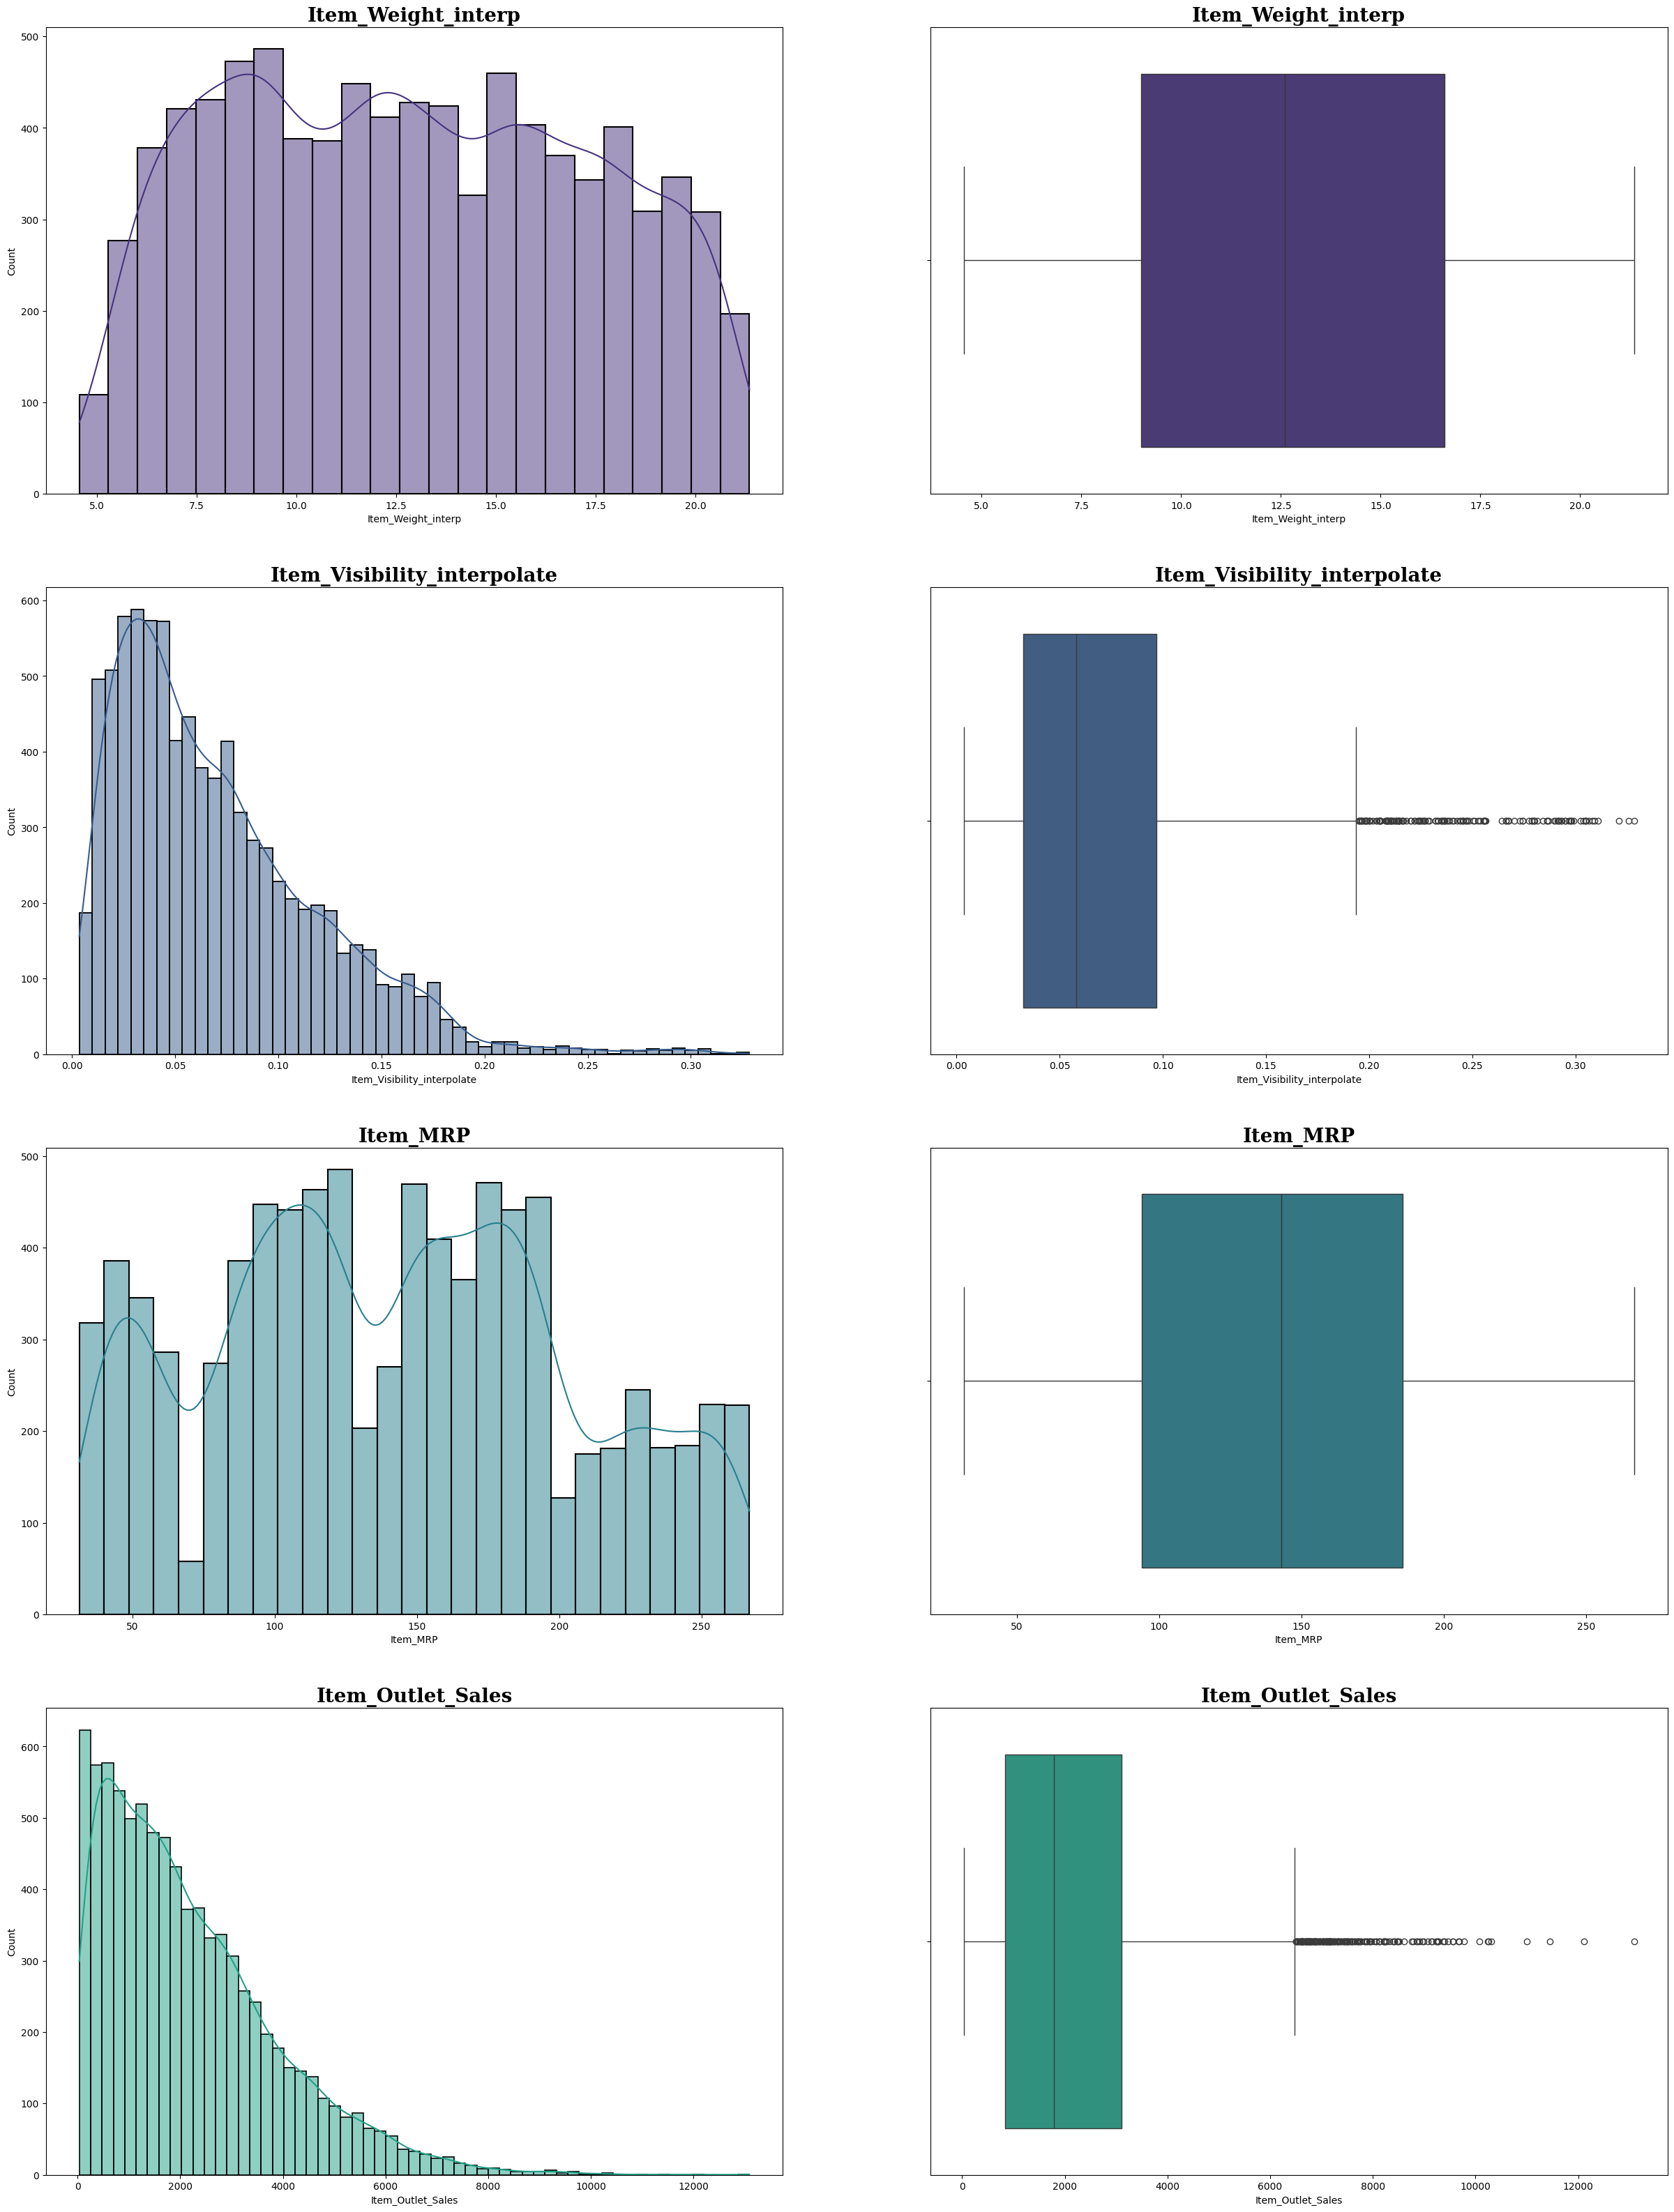

In [299]:
num_columns = ['Item_Weight_interp','Item_Visibility_interpolate','Item_MRP','Item_Outlet_Sales'] # Updated column names
kdeplot_and_boxplot(train_data,num_columns)

## EDA on Catagorical data

In [301]:
def pie_plot(columns,train_data):
    num_columns = 2
    num_rows = 3

    fig,axes = plt.subplots(num_rows,num_columns,figsize=(14,12))
    axes = axes.flatten()
    for i,column in enumerate(columns):
        counts = train_data[column].value_counts()
        palette = sns.color_palette('viridis',train_data[column].nunique())

        axes[i].pie(counts.values,labels=counts.index,autopct='%.2f%%',colors=palette)
        axes[i].set_title(f'{column} Distribution',fontsize=20,fontweight='bold')

    for j in range(len(columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [302]:
df_cp =  train_data.copy()
item_counts = df_cp['Item_Type'].value_counts()

def categorize_item_type(item_type):
    if item_counts[item_type] < 445:
        return 'Others'
    return item_type

df_cp['Item_Type'] = df_cp['Item_Type'].apply(categorize_item_type)
df_cp['Item_Type'].value_counts()

,count
Item_Type,
Others,1381
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520


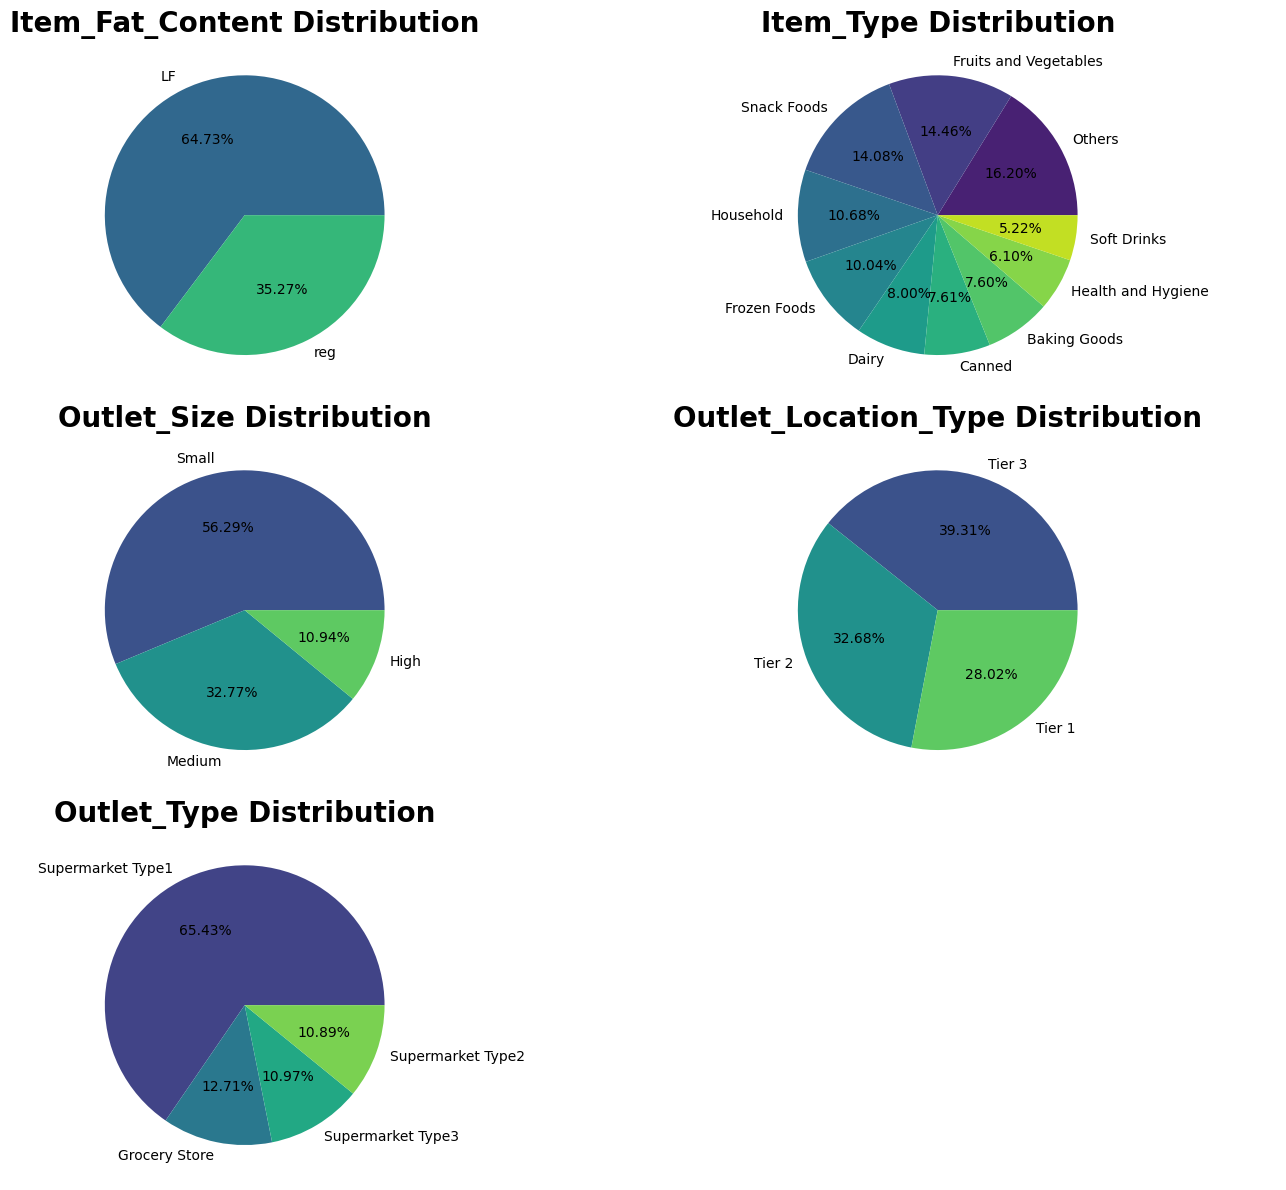

In [303]:
cat_columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
pie_plot(cat_columns,df_cp)

# Handleing Catagorical Columns
using ordinal encoding

In [237]:
from sklearn.preprocessing import OrdinalEncoder

In [238]:
encoded_train_data = train_data.copy()
encoded_test_data = test_data.copy()

In [239]:
cat_cols_train = train_data.select_dtypes(include='object').columns
cat_cols_test = test_data.select_dtypes(include='object').columns

for col in cat_cols_train:
  oe_train = OrdinalEncoder()
  encoded_train_data[col] = oe_train.fit_transform(train_data[[col]])
  oe_test = OrdinalEncoder()
  encoded_test_data[col] = oe_test.fit_transform(test_data[[col]])
  print(col)
  print(oe_train.categories_)
  print(oe_test.categories_)

Item_Identifier
[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['DR', 'FD', 'NC'], dtype=object)]
Item_Fat_Content
[array(['LF', 'reg'], dtype=object)]
[array(['LF', 'reg'], dtype=object)]
Item_Type
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
Outlet_Identifier
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT0

In [240]:
encoded_test_data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interp,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,13.0,107.8622,9.0,1.0,0.0,1.0,20.7500,0.007565,26
1,0.0,1.0,4.0,87.3198,2.0,2.0,1.0,1.0,8.3000,0.038428,18
2,1.0,0.0,11.0,241.7538,0.0,2.0,2.0,0.0,14.6000,0.099575,27
3,1.0,0.0,13.0,155.0340,2.0,2.0,1.0,1.0,7.3150,0.015388,18
4,2.0,1.0,4.0,234.2300,5.0,1.0,2.0,3.0,8.5575,0.118599,40


In [241]:
encoded_train_data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interp,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,26
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,16
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,26
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,27
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,38


Spliting Features and Target from Training Data

In [242]:
X = encoded_train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
y = encoded_train_data['Item_Outlet_Sales']

In [243]:
X

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interp,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,26
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,16
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,26
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,27
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,38
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,6.865,0.056783,38
8519,1.0,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,8.380,0.046982,23
8520,2.0,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,10.600,0.035186,21
8521,1.0,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,7.210,0.145221,16


We are dealing with coninuous target varialbles So we are goining to use

In [244]:
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


Spliting data into training and testing

# Random Forest Regressionn

In [255]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=5)
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(scores)
print(scores.mean())

[0.57388238 0.53623065 0.51562143 0.55566217 0.57315155]
0.5509096350391707


# XGBRF Regression

In [256]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score

xg = XGBRFRegressor(n_estimators=100, random_state=5)
scores = cross_val_score(xg, X, y, cv=5, scoring='r2')
print(scores)
print(scores.mean())

[0.60646716 0.58370233 0.57324166 0.60542284 0.60777341]
0.5953214802160031


XGBRF Regression Feature importance

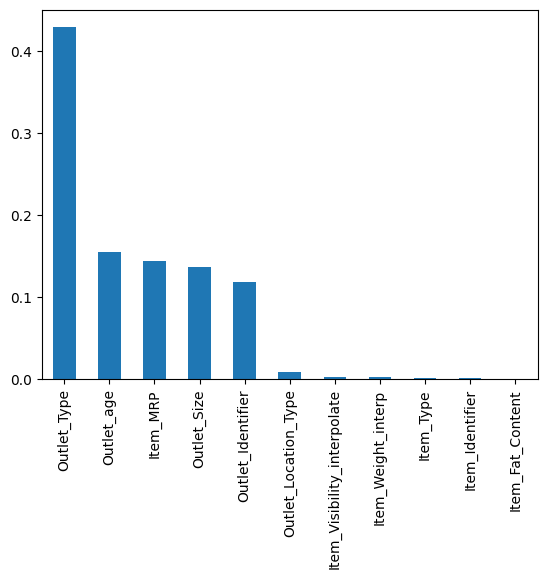

In [257]:
xg =XGBRFRegressor(n_estimators=100, random_state=42)

xg1 = xg.fit(X,y)

feature_importances = pd.Series(xg1.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [258]:
# lets drop other columns
['Item_Fat_Content', 'Item_Identifier','Item_Type', 'Item_Weight_interp' , 'Item_Visibility_interpolate' , 'Outlet_Location_Type'  ]

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Item_Weight_interp',
 'Item_Visibility_interpolate',
 'Outlet_Location_Type']

In [260]:
from xgboost import XGBRFRegressor
xg = XGBRFRegressor(n_estimators=100, random_state=5)

score = cross_val_score(xg1, X.drop(['Item_Fat_Content', 'Item_Identifier','Item_Type', 'Item_Weight_interp' , 'Item_Visibility_interpolate' , 'Outlet_Location_Type']), y, cv=5, scoring='r2')
print(score)
print(score.mean())

KeyError: "['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Item_Weight_interp', 'Item_Visibility_interpolate', 'Outlet_Location_Type'] not found in axis"

In [261]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score

xg = XGBRFRegressor(n_estimators=100, random_state=5)

# Get the list of columns after encoding
encoded_columns = X.columns

# Check if the columns you want to drop are present after encoding
columns_to_drop = ['Item_Fat_Content', 'Item_Identifier','Item_Type', 'Item_Weight_interp' , 'Item_Visibility_interpolate' , 'Outlet_Location_Type']
columns_to_drop = [col for col in columns_to_drop if col in encoded_columns]


# Drop only the existing columns after encoding
score = cross_val_score(xg1, X.drop(columns=columns_to_drop, errors='ignore'), y, cv=5, scoring='r2')
print(score)
print(score.mean())

[0.60768305 0.58237482 0.57373058 0.60940418 0.60766936]
0.5961723971108985


In [262]:
final_data = X.drop(['Item_Fat_Content', 'Item_Identifier','Item_Type', 'Item_Weight_interp' , 'Item_Visibility_interpolate' , 'Outlet_Location_Type'],axis=1)

In [263]:
final_data.head(5)

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,26
1,48.2692,3.0,1.0,2.0,16
2,141.6180,9.0,1.0,1.0,26
3,182.0950,0.0,2.0,0.0,27
4,53.8614,1.0,0.0,1.0,38


# Best Model

In [264]:
from xgboost import XGBRFRegressor
xg_final = XGBRFRegressor()
regressor = xg_final.fit(final_data,y)

In [265]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xg_final, final_data, y, cv=5, scoring='r2')
print(scores)
print(scores.mean())

[0.60774852 0.58217701 0.57416544 0.60981829 0.60829052]
0.5964399551022094


In [266]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [269]:
classifier = GridSearchCV(xg_final, param_grid, cv=5, scoring='r2')
# Fit the GridSearchCV object to the data
classifier.fit(final_data, y)  # This line is added to fit the model
# Access the cv_results_ attribute
classifier.cv_results_

{'mean_fit_time': array([0.06597166, 0.10939145, 0.16039014, 0.07185879, 0.33981676,
        0.18970323, 0.22829704, 0.38075194, 0.23157954, 0.06335287,
        0.11900578, 0.67702184, 0.07124672, 0.13097897, 0.37712655,
        0.08550134, 0.53108649, 0.2307086 , 0.06119194, 0.11237874,
        0.1590107 , 0.07311802, 0.13271675, 0.18934464, 0.08553696,
        0.15987153, 0.23020015]),
 'std_fit_time': array([0.00708661, 0.0027209 , 0.00998908, 0.00209798, 0.41302281,
        0.00892798, 0.22121763, 0.44194962, 0.00719399, 0.00587737,
        0.02058939, 0.37194873, 0.00133358, 0.0058944 , 0.35227432,
        0.00155611, 0.51707807, 0.0114395 , 0.00109772, 0.00771484,
        0.00988983, 0.00319708, 0.0096036 , 0.00512235, 0.00150662,
        0.0076164 , 0.00768126]),
 'mean_score_time': array([0.00653229, 0.00792909, 0.00970984, 0.00707407, 0.00906963,
        0.0110714 , 0.0109488 , 0.01125293, 0.0130836 , 0.01127415,
        0.00894499, 0.01733837, 0.00694208, 0.01019325, 0.010822

In [270]:
best_params = classifier.best_params_
print(best_params)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


In [271]:
# Highest accuracy
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.21147893460582026


In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size=0.2, random_state=4)

In [276]:
xg_final.fit(X_train , y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [277]:
y_pred = xg_final.predict(X_test)

In [278]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

758.5187057826032

# <> Final Data

In [279]:
encoded_test_data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interp,Item_Visibility_interpolate,Outlet_age,Item_Outlet_Sales
0,1.0,0.0,13.0,107.8622,9.0,1.0,0.0,1.0,20.7500,0.007565,26,1387.300415
1,0.0,1.0,4.0,87.3198,2.0,2.0,1.0,1.0,8.3000,0.038428,18,1173.834717
2,1.0,0.0,11.0,241.7538,0.0,2.0,2.0,0.0,14.6000,0.099575,27,721.459229
3,1.0,0.0,13.0,155.0340,2.0,2.0,1.0,1.0,7.3150,0.015388,18,2480.607178
4,2.0,1.0,4.0,234.2300,5.0,1.0,2.0,3.0,8.5575,0.118599,40,4655.225586


In [281]:
# Select only the columns used during training from encoded_test_data
relevant_cols = final_data.columns  # Columns used for training
encoded_test_data['Item_Outlet_Sales'] = xg_final.predict(encoded_test_data[relevant_cols])

In [282]:
encoded_test_data.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interp,Item_Visibility_interpolate,Outlet_age,Item_Outlet_Sales
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,1.086604,0.354339,7.233410,141.023273,4.722760,1.453617,1.112832,1.201373,12.696595,0.070268,27.171097,2187.734863
std,0.518223,0.478355,4.219057,61.809091,2.837201,0.683048,0.812824,0.796740,4.471120,0.049300,8.372256,1327.442749
min,0.000000,0.000000,0.000000,31.990000,0.000000,0.000000,0.000000,0.000000,4.555000,0.003591,16.000000,85.670311
25%,1.000000,0.000000,4.000000,94.412000,2.000000,1.000000,0.000000,1.000000,8.895000,0.032469,21.000000,1062.921997
50%,1.000000,0.000000,6.000000,141.415400,5.000000,2.000000,1.000000,1.000000,12.500000,0.058461,26.000000,2072.287109
75%,1.000000,1.000000,10.000000,186.026600,7.000000,2.000000,2.000000,1.000000,16.350000,0.096926,38.000000,3065.597900
max,2.000000,1.000000,15.000000,266.588400,9.000000,2.000000,2.000000,3.000000,21.350000,0.323637,40.000000,6679.775879


In [283]:
sample_submission = pd.read_csv('/content/sample_submission.csv')

In [284]:
sample_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [285]:
sample_submission['Item_Outlet_Sales'] = encoded_test_data['Item_Outlet_Sales']

In [286]:
sample_submission.to_csv('Rohit_Rohit_Final_imp.csv', index = False)

In [287]:
read = pd.read_csv('/content/Rohit_Rohit_Final_imp.csv')

In [288]:
read

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1620.14830
1,FDW14,OUT017,1451.85280
2,NCN55,OUT010,528.51953
3,FDQ58,OUT017,2503.79830
4,FDY38,OUT027,6102.74500
...,...,...,...
5676,FDB58,OUT046,2096.90000
5677,FDD47,OUT018,2621.98220
5678,NCO17,OUT045,1978.60730
5679,FDJ26,OUT017,3724.73830


In [289]:
read.describe()

,Item_Outlet_Sales
count,5681.000000
mean,2187.734925
std,1327.441976
min,85.670310
25%,1062.922000
50%,2072.287000
75%,3065.598000
max,6679.776000
